In [3]:
import numpy as np
# <!-- Analyzing the rating behaviour of Documentary movies over 121 years i.e. from 1894 to 2015 -->

In [9]:
X=np.array([[1,0],[0,1]])
Y=np.array([[2,1],[1,2]]) 
Z=np.dot(X,Y)
Z

array([[2, 1],
       [1, 2]])

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [3]:
Movie = pd.read_csv('./OneDrive/Desktop/Micromasters/Python for Data Science/Week 6/movies.csv')
Movie.shape

(27278, 3)

In [4]:
Movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
Movie.describe()

,movieId
count,27278.000000
mean,59855.480570
std,44429.314697
min,1.000000
25%,6931.250000
50%,68068.000000
75%,100293.250000
max,131262.000000


In [6]:
Movie['year'] = Movie['title'].str.extract('.*\((.*)\).*',expand = True)
Movie.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [10]:
rating = pd.read_csv('./OneDrive/Desktop/Micromasters/Python for Data Science/Week 6/ratings.csv')

In [12]:
del rating['timestamp']

In [13]:
rating.shape

(25000095, 3)

In [14]:
rating.head()

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5


In [15]:
rating.describe()

,userId,movieId,rating
count,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00
std,4.679172e+04,3.919886e+04,1.060744e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,4.051000e+04,1.196000e+03,3.000000e+00
50%,8.091400e+04,2.947000e+03,3.500000e+00
75%,1.215570e+05,8.623000e+03,4.000000e+00
max,1.625410e+05,2.091710e+05,5.000000e+00


In [16]:
avg_rating = rating.groupby('movieId', as_index = False).mean()
box_office = Movie.merge(avg_rating, on = 'movieId', how = 'inner')
box_office.shape
box_office.head()

,movieId,title,genres,year,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,81294.564728,3.893708
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,81358.542554,3.251527
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,81343.694934,3.142028
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,81266.193024,2.853547
4,5,Father of the Bride Part II (1995),Comedy,1995,81002.872460,3.058434


In [17]:
Doc = box_office [(box_office.genres == 'Documentary')]
Doc.head()

,movieId,title,genres,year,userId,rating
76,77,Nico Icon (1995),Documentary,1995,81352.909953,3.402844
97,99,Heidi Fleiss: Hollywood Madam (1995),Documentary,1995,84324.905689,3.101048
106,108,Catwalk (1996),Documentary,1996,88036.365217,3.073913
114,116,Anne Frank Remembered (1995),Documentary,1995,83564.330286,3.911429
126,128,Jupiter's Wife (1994),Documentary,1994,83893.154930,3.485915


In [18]:
Doc.shape

(1606, 6)

In [19]:
Doc.dtypes

movieId      int64
title       object
genres      object
year        object
userId     float64
rating     float64
dtype: object

In [20]:
Doc['year'] = pd.to_numeric(Doc['year'], errors='coerce')
print('Year Min:', Doc['year'].min(), 'Year Max:', Doc['year'].max())

Year Min: 1894 Year Max: 2015


<ipython-input-20-38e3712b2795>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Doc['year'] = pd.to_numeric(Doc['year'], errors='coerce')


Data Visulaisation (Scatter Plot)

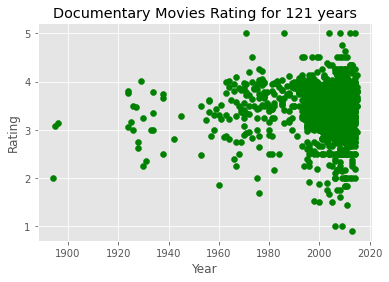

In [23]:
plt.scatter(x=Doc['year'],y=Doc['rating'],color = 'green')
plt.title('Documentary Movies Rating for 121 years')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.grid(True)
plt.show()